In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

# read an image

In [2]:
imgg = cv2.imread("faceRGB.jpg")

In [3]:
type(imgg)

numpy.ndarray

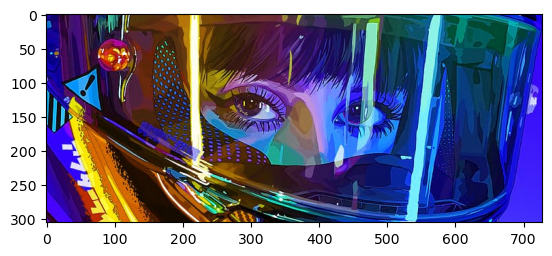

In [4]:
plt.imshow(imgg)

In [5]:
# cv2.imshow("window",imgg)
# cv2.waitKey(0)

In [6]:
gray_img = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)

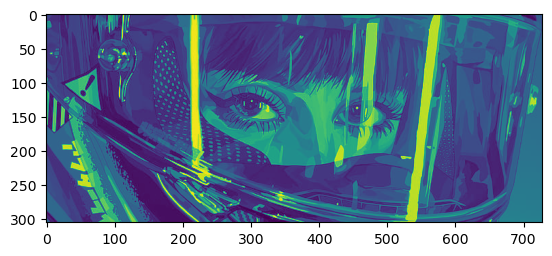

In [7]:
plt.imshow(gray_img)

In [8]:
gray_img.shape

(305, 728)

In [9]:
imgBlue=imgg[:,:,0]
imgGreen=imgg[:,:,1]
imgRed=imgg[:,:,2]

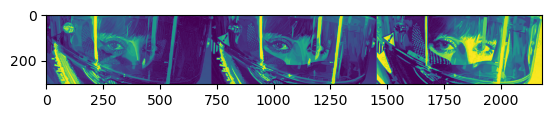

In [10]:
plt.imshow(np.hstack((imgBlue, imgGreen, imgRed)))

# openCv Events

In [11]:
img = np.zeros((512,512,3))

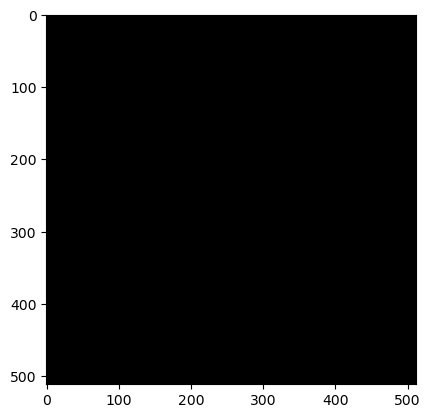

In [12]:
plt.imshow(img)

In [15]:
flag = False
ix=-1
iy=-1

def draw(event,x,y,flags,params):
    
    global flag,ix,iy
    r = int(math.sqrt((x - ix)**2 + (y - iy)**2))
    if event ==1:
        flag = True
        ix= x
        iy= y
    if event ==0:
        if flag == True:
            cv2.circle(img, center=(ix,iy), radius=r, color=(0,0,255), thickness=-1)
    if event ==4:
        flag=False
        cv2.circle(img, center=(ix,iy), radius=r, color=(0,0,255), thickness=-1)

In [17]:
cv2.namedWindow(winname="window")
cv2.setMouseCallback("window",draw)
while True:
    cv2.imshow("window", img)
    if cv2.waitKey(1) & 0xFF ==ord('x'):
        break
cv2.destroyAllWindows()

# image Croping tool

In [25]:
imgg = cv2.imread("man.png")
flag = False
ix=-1
iy=-1

def crop(event,x,y,flags,params):
    
    global flag,ix,iy
    r = int(math.sqrt((x - ix)**2 + (y - iy)**2))
    if event ==1:
        flag = True
        ix= x
        iy= y
    if event ==4:
        fx=x
        fy=y
        flag=False
        cv2.rectangle(imgg, pt1=(ix,iy), pt2=(x,y), thickness=1, color=(0,0,1))
        
        #crop tools
        cropped = imgg[iy:fy, ix:fx]
        cv2.imshow("new_window",cropped)


cv2.namedWindow(winname="window")
cv2.setMouseCallback("window",crop)
while True:
    cv2.imshow("window", imgg)
    if cv2.waitKey(1) & 0xFF ==ord('x'):
        break
cv2.destroyAllWindows()